## Style-Your-Hair 불러오기

https://github.com/Taeu/Style-Your-Hair

In [1]:
!git clone https://github.com/Taeu/Style-Your-Hair.git
!cd Style-Your-Hair

fatal: destination path 'Style-Your-Hair' already exists and is not an empty directory.


In [2]:
# !conda create -n {env} python=3.7.9
# !conda activate {env}
# !conda install --yes pytorch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0 cudatoolkit=11.1 -c pytorch -c conda-forge
!pip install face_alignment face-recognition gdown ipython matplotlib

  Using cached face_alignment-1.3.5-py2.py3-none-any.whl
  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached gdown-4.6.4-py3-none-any.whl (14 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached numba-0.56.4-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached llvmlite-0.39.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)


In [3]:
!pip install ninja
# !unzip /content/Style-Your-Hair/ninja-linux.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.7 MB/s eta 0:00:00


## Real-ESRGAN 불러오기

In [ ]:
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-vmure5pz
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-vmure5pz
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 5.5 MB/s eta 0:00:00
  Created wheel for RealESRGAN: filename=RealESRGAN-1.0-py3-none-any.whl size=9135 sha256=c156798b440913fcf6b0e3251fa98b5c08044da71d98ac7cd7f76bf46d856ea6
  Stored in directory: /tmp/pip-ephem-wheel-cache-2viajat7/wheels/c0/01/e8/75182eda1345ba06ce17ba42cdf548f70e87623d9cc97a56c3
Successfully built RealESRGAN


In [ ]:
import os
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth', download=True)

os.makedirs('inputs')

/usr/local/lib/python3.8/dist-packages/huggingface_hub/file_download.py:629: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


Weights downloaded to: weights/RealESRGAN_x4.pth


## 사진 파일 불러오기

In [6]:
%cd /home/aiku/AIKU/hair/Style-Your-Hair
# !unzip -qq "/content/drive/MyDrive/Colab Notebooks/AIKU/new_input_ffhq.zip"

from PIL import Image
import os

os.mkdir('ffhq_image')

/home/aiku/AIKU/hair/Style-Your-Hair


In [11]:
# source image(사용자 이미지)
img1 = Image.open('/home/aiku/AIKU/hair/source3_jpg.jpg')
img1 = img1.resize((1024, 1024))
img1.save('/home/aiku/AIKU/hair/Style-Your-Hair/ffhq_image/source.jpg')

In [12]:
# target image(헤어스타일 이미지)
img2 = Image.open('/home/aiku/AIKU/hair/target7_jpg.jpg')
img2 = img2.resize((1024, 1024))
img2.save('./ffhq_image/target.jpg')

In [ ]:
# path_to_image = 'inputs/target.png'
image = Image.open('/home/aiku/AIKU/hair/Style-Your-Hair/ffhq_image/target.jpg').convert('RGB')
sr_image = model.predict(image)

sr_image.save('./ffhq_image/target.jpg')

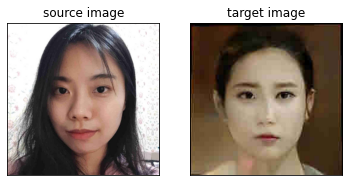

In [10]:
import matplotlib.pyplot as plt

# os.chdir('/content/Style-Your-Hair')

img1 = Image.open('./ffhq_image/source.jpg')
img2 = Image.open('./ffhq_image/target.jpg')

imgs = [img1, img2]
for i in range(2) : 
    image_index = i + 1
    plt.subplot(1, 2, image_index) # subplot 
    if i == 0:
      plt.title('source image')
    else:
      plt.title('target image')
    plt.xticks([])  # x = None 
    plt.yticks([])  # y = None
    plt.imshow(imgs[i])
plt.show()

## style 변환

In [2]:
%cd /home/aiku/AIKU/hair/Style-Your-Hair

/home/aiku/AIKU/hair/Style-Your-Hair


In [4]:
!python main.py --input_dir ./ffhq_image/ --im_path1 source.jpg --im_path2 target.jpg \
    --output_dir ./style_your_hair_output/ \
    --warp_loss_with_prev_list delta_w style_hair_slic_large \
    --save_all --version final --flip_check

Loading StyleGAN2 from checkpoint: pretrained_models/ffhq.pt
torch.Size([512])
Setting up Perceptual loss...
/home/aiku/AIKU/anaconda3/envs/hair/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aiku/AIKU/anaconda3/envs/hair/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading model from: /home/aiku/AIKU/hair/Style-Your-Hair/losses/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done
cal. kp. diff. time : 12.675518035888672
Number of images: 2
Images:   0%|                      

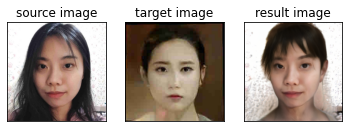

<Figure size 432x576 with 0 Axes>

In [11]:
img3 = Image.open('./style_your_hair_output/source_target.png')
imgs = [img1, img2, img3]

for i in range(3) : 
    image_index = i + 1
    plt.subplot(1, 3, image_index) # subplot 
    if i == 0:
      plt.title('source image')
    elif i == 1:
      plt.title('target image')
    elif i == 2:
      plt.title('result image')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i])  
plt.figure(figsize=(6,8))
plt.show()